In [1]:
import sys
sys.path.append('../mlai_research/')
import log
import utils
import rasterio
import rasterio.plot
from rasterio.mask import mask
from rasterio.enums import Resampling
from rasterio.warp import reproject, Resampling
from rasterio.plot import show
from shapely.geometry import box, mapping
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import glob
from skimage.segmentation import quickshift, felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage import io
import cv2

In [2]:
logger = log.get_logger(__name__)

In [3]:
conf = utils.load_config('base')

09-Nov-23 00:23:29 - INFO - Starting 'load_config'.
09-Nov-23 00:23:29 - INFO - Finished 'load_config' in 0.0649 secs.


In [4]:
# Load the image
image = io.imread(f"{conf.data.path_pri_rgb}44.tif")

In [5]:
image.shape

(37, 37, 4)

In [6]:
def normalize_image(image):
    normalized_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized_image

In [7]:
normalized_image = normalize_image(image)

In [8]:
normalized_image.shape

(37, 37, 4)

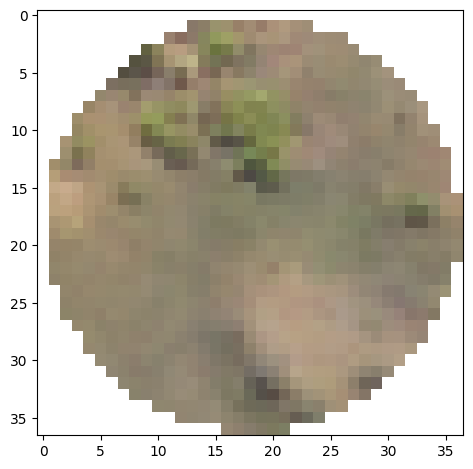

In [9]:
# Display the segments
io.imshow(normalized_image)
io.show()

In [10]:
normalized_image.shape

(37, 37, 4)

In [11]:
img_rgb = normalized_image[:,:,:3]

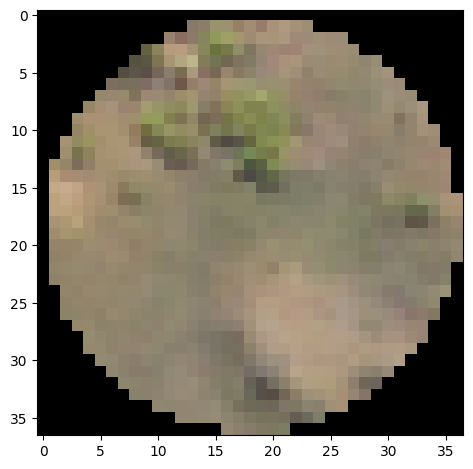

In [12]:
io.imshow(img_rgb)
io.show()

In [13]:
# Perform Quickshift segmentation
# segments = quickshift(normalized_image, ratio=0.99, convert2lab=False, kernel_size=3, max_dist=6, sigma=0)
segments_fz = felzenszwalb(img_rgb, scale=100, sigma=0.5, min_size=50)

In [ ]:
# Perform Quickshift segmentation
# segments = quickshift(image, ratio=0.99, convert2lab=False, kernel_size=3, max_dist=6, sigma=0)

In [16]:
img_rgb.shape

(37, 37, 3)

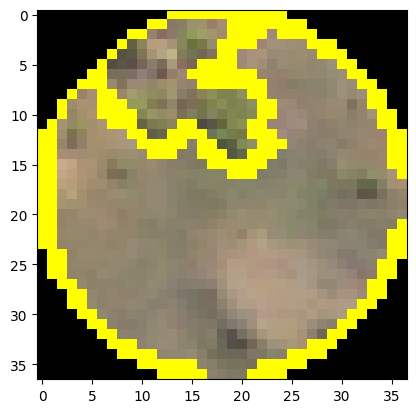

In [15]:
# fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(mark_boundaries(img_rgb, segments_fz))
plt.show()

In [ ]:
# Initialize arrays to store the color features
mean_colors = np.zeros((segments_fz.max() + 1, 3))  # for mean
std_colors = np.zeros((segments_fz.max() + 1, 3))  # for standard deviation

# Loop over each segment
for segment_id in np.unique(segments_fz):
    # Get the pixels of the segment
    segment_pixels = img[segments_fz == segment_id]
    # Calculate and store the mean and standard deviation of the RGB values of the segment
    mean_colors[segment_id] = segment_pixels.mean(axis=0)
    std_colors[segment_id] = segment_pixels.std(axis=0)

In [ ]:
# segments_qs = quickshift(img_rgb, ratio=0.5, kernel_size=3, max_dist=6, sigma=0)

In [ ]:
# fig, ax = plt.subplots(figsize = (20,20))
# plt.imshow(mark_boundaries(img_rgb, segments_qs))
# plt.show()